# **Quora Question Pairs**

**Description :-** The Quora Question Pair Similarity project is a machine learning-based model that predicts whether two questions on the Quora platform are similar or not. This model uses natural language processing (NLP) techniques to compare two questions and assess their semantic similarity, providing a binary classification result: similar or not similar.


# **Dataset Link** - https://www.kaggle.com/c/quora-question-pairs

# **Importing csv File**

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/quora-question-pairs.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile("/content/train.csv.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [ ]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
39482,39482,71561,71562,How is the value of a 1947 Canadian quarter de...,How is the value of a 1947 quarter determined?...,1
3043,3043,6033,6034,What are some of the must listen carnatic song...,What are some of the must-listen Carnatic Songs?,0
46148,46148,82580,82581,I'm a 3rd year mechanical engineering student....,I'm a 3rd year mechanical engineering student....,1
365994,365994,496133,496134,What is Plato's Republic about?,What is Plato's ploitical philisophy?,1
29279,29279,54190,54191,What is the difference between a turbocharger ...,What is the difference between supercharging a...,1
26571,26571,49437,49438,Is World War 3 coming?,Is WW3 coming?,1
137122,137122,117216,158898,What do you do to achieve peace of mind?,Where can I find peace of mind?,1
330743,330743,140819,42761,What is a good example of a sentence using the...,What are good examples of sentences using a me...,0
294418,294418,416316,416317,"As a Malaysian living in Singapore, what are s...",What are your greatest pet peeves about living...,0
115956,115956,188988,188989,How much does a Tesla charging station cost?,How much do the batteries in a Tesla Model S c...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
# missing values
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [ ]:
# duplicate rows
df.duplicated().sum()

0

# **Basic EDA**

In [ ]:
df['is_duplicate'].count()

404290

In [ ]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

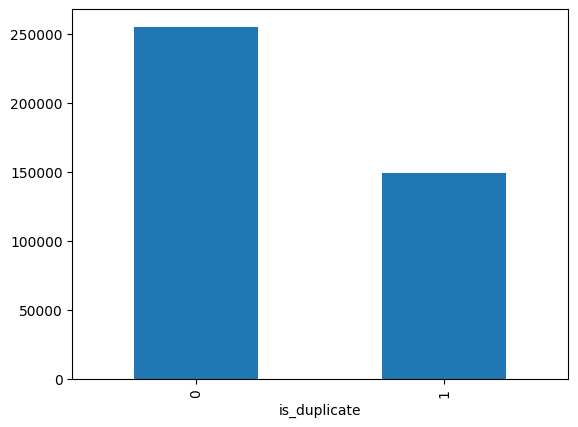

In [ ]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


In [ ]:
qid.value_counts()

,count
2559,157
30782,120
4044,111
2561,88
14376,79
...,...
416446,1
416444,1
416441,1
416439,1


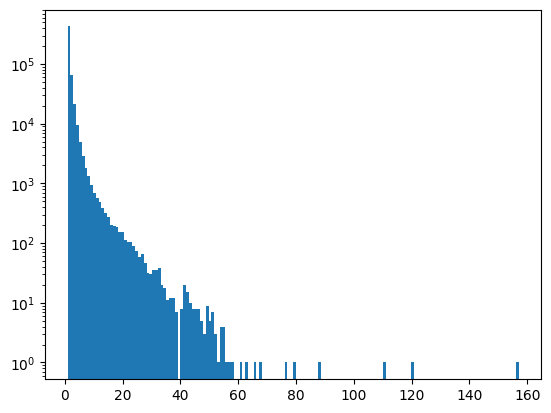

In [ ]:
# Distribution of Unique questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [ ]:
qid = pd.Series(qid)

In [ ]:
counts = qid.value_counts()
counts

,count
2559,157
30782,120
4044,111
2561,88
14376,79
...,...
416446,1
416444,1
416441,1
416439,1


In [ ]:
counts[counts>1].values

array([157, 120, 111, ...,   2,   2,   2])

In [ ]:
counts[counts>1].values.shape[0]

111780

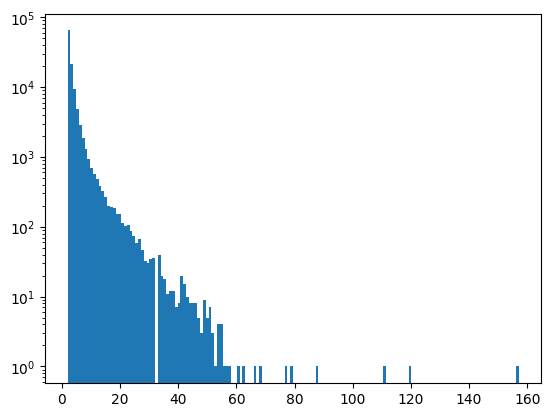

In [ ]:
# Distribution of Repeated questions histogram

plt.hist(counts[counts>1].values,bins=160)
plt.yscale('log')
plt.show()

# **Features Engineering**

In [ ]:
df.fillna('unknown', inplace = True)

In [ ]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [ ]:
# Character Length

df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39


In [ ]:
# Word Length

df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split()))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split()))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7


In [ ]:
# Common words

def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [ ]:
# Common words

def common_words(row):
  w1 = set(row['question1'].lower().strip().split())
  w2 = set(row['question2'].lower().strip().split())
  return len(w1 & w2)

In [ ]:
df['word_common'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2


In [ ]:
df.loc[398782]

,398782
id,398782
qid1,496695
qid2,532029
question1,What is the best marketing automation tool for...
question2,What is the best marketing automation tool for...
is_duplicate,1
q1_len,76
q2_len,77
q1_num_words,12
q2_num_words,12


In [ ]:
# Total words

def total_words(row):
  w1 = (row['question1'].lower().strip().split())
  w2 = (row['question2'].lower().strip().split())
  return (len(w1) + len(w2))

In [ ]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,26
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,21
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,20
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20


In [ ]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,26,0.38
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,21,0.19
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24,0.17
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,20,0.00
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20,0.10


# **EDA after Feature Engineering**

### **Distribution of characters**

minimum characters 1
maximum characters 623
average num of characters 59


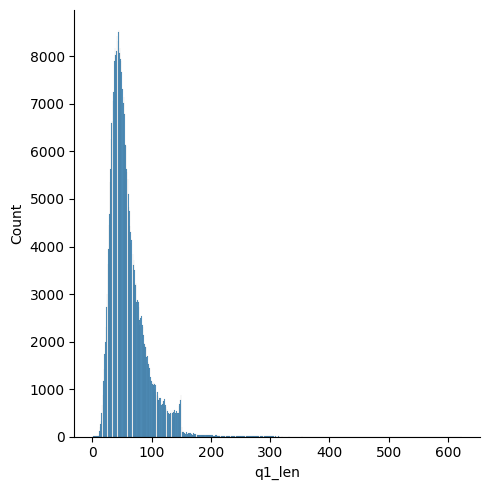

In [ ]:
# Distribution of characters in question 1

sns.displot(df['q1_len'])
print('minimum characters',df['q1_len'].min())
print('maximum characters',df['q1_len'].max())
print('average num of characters',int(df['q1_len'].mean()))

minimum characters 1
maximum characters 1169
average num of characters 60


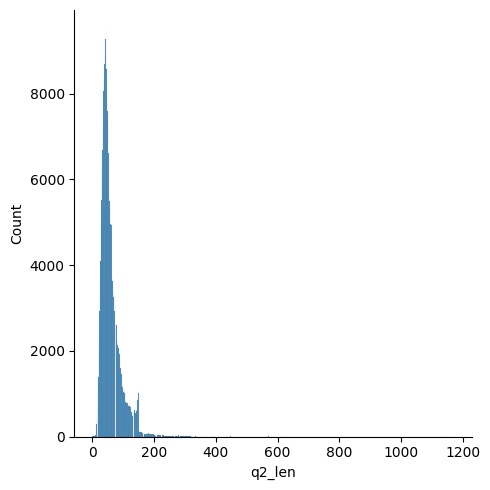

In [ ]:
# Distribution of characters in question 2

sns.displot(df['q2_len'])
print('minimum characters',df['q2_len'].min())
print('maximum characters',df['q2_len'].max())
print('average num of characters',int(df['q2_len'].mean()))

### **Distribution of Words**

minimum words 1
maximum words 125
average num of words 10


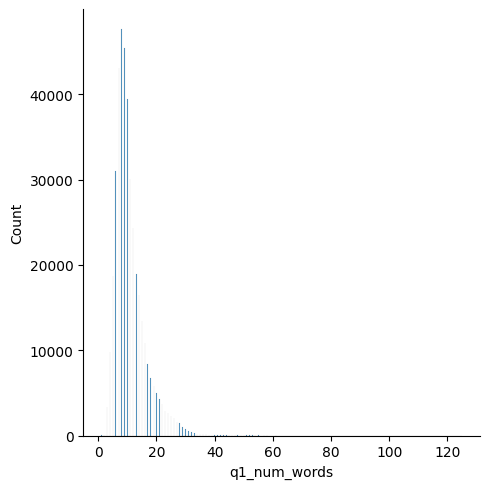

In [ ]:
# Distribution of words in Question 1

sns.displot(df['q1_num_words'])
print('minimum words',df['q1_num_words'].min())
print('maximum words',df['q1_num_words'].max())
print('average num of words',int(df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


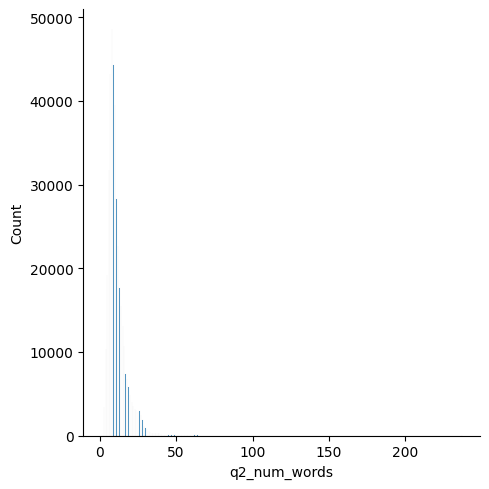

In [ ]:
# Distribution of words in Question 2

sns.displot(df['q2_num_words'])
print('minimum words',df['q2_num_words'].min())
print('maximum words',df['q2_num_words'].max())
print('average num of words',int(df['q2_num_words'].mean()))

### **Distribution of Common Words**

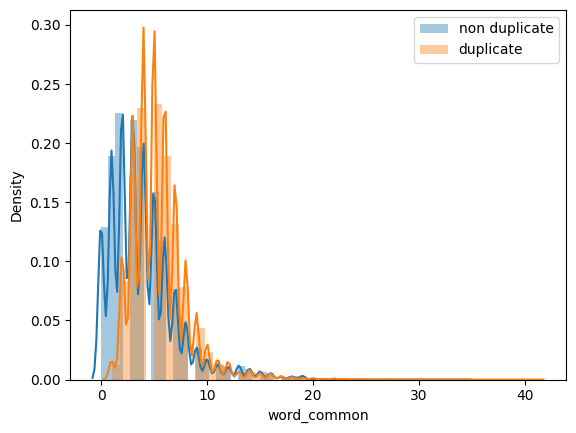

In [ ]:
# common words
sns.distplot(df[df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

### **Distribution of Total Words**

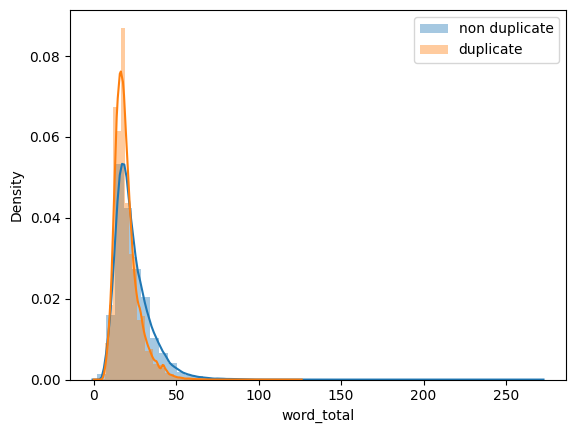

In [ ]:
# total words
sns.distplot(df[df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

### **Distribution of Word Share**

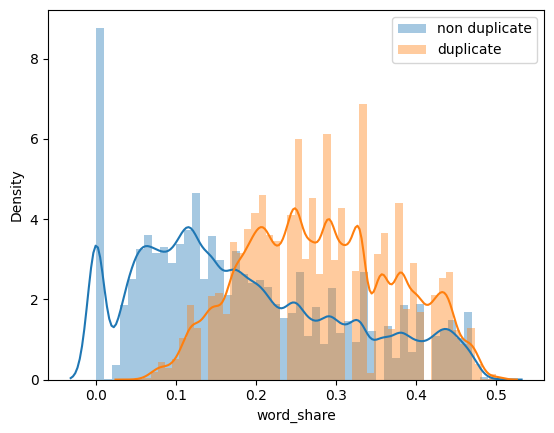

In [ ]:
# word share
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

# **Feature Extraction using BOW**

**Since Dataset is so Large that's why taking only random 50000 question**

In [ ]:
new_df = df.sample(50000,random_state=2)

In [ ]:
new_df.shape

(50000, 13)

In [ ]:
ques_df = new_df[['question1','question2']]
print(ques_df.shape)
ques_df.head()

(50000, 2)


,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
bow = cv.fit_transform(questions).toarray()

In [ ]:
bow.shape

(100000, 3000)

In [ ]:
q1_arr, q2_arr = np.vsplit(bow,2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 6000)

In [ ]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,27,0.26
327711,0,105,120,25,17,2,42,0.05
367788,0,59,146,12,30,0,42,0.00
151235,0,35,50,5,9,3,14,0.21


In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(50000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,27,0.26,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,42,0.05,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,42,0.00,0,0,...,0,0,1,0,0,0,0,0,0,0
151235,0,35,50,5,9,3,14,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Random Forest and XGBoost**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,
                                                 test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7685

In [ ]:
RFC_accuracy = accuracy_score(y_test,y_pred)
print(round(RFC_accuracy*100,2))

76.85


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7648

In [ ]:
XGC_accuracy = accuracy_score(y_test,y_pred)
print(round(XGC_accuracy*100,2))

76.48


# **Feature Extraction using Tf-idf**

In [ ]:
print(ques_df.shape)
ques_df.head()

(50000, 2)


,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = TfidfVectorizer(max_features=3000)
tfidf = cv.fit_transform(questions).toarray()

In [ ]:
tfidf.shape

(100000, 3000)

In [ ]:
q1_arr, q2_arr = np.vsplit(tfidf,2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 6000)

In [ ]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,27,0.26
327711,0,105,120,25,17,2,42,0.05
367788,0,59,146,12,30,0,42,0.00
151235,0,35,50,5,9,3,14,0.21


In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(50000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115086,0,49,57,12,15,7,27,0.26,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327711,0,105,120,25,17,2,42,0.05,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367788,0,59,146,12,30,0,42,0.00,0.0,0.0,...,0.0,0.0,0.173053,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151235,0,35,50,5,9,3,14,0.21,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Random Forest and XGBoost**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,
                                                 test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7671

In [ ]:
RFC_accuracy = accuracy_score(y_test,y_pred)
print(round(RFC_accuracy*100,2))

76.71


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7623

In [ ]:
XGC_accuracy = accuracy_score(y_test,y_pred)
print(round(XGC_accuracy*100,2))

76.23


# **Feature Extraction using Word2Vec**

In [ ]:
new_df = df.sample(50000,random_state=2)

In [ ]:
new_df.shape

(50000, 13)

In [ ]:
ques_df = new_df[['question1','question2']]
print(ques_df.shape)
ques_df.head()

(50000, 2)


,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [ ]:
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import gensim

from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [ ]:
all_que = []

for sent in questions:
  all_que.append(simple_preprocess(sent))

In [ ]:
all_que

[['what',
  'is',
  'the',
  'best',
  'marketing',
  'automation',
  'tool',
  'for',
  'small',
  'and',
  'mid',
  'size',
  'companies'],
 ['am', 'poor', 'but', 'want', 'to', 'invest', 'what', 'should', 'do'],
 ['am',
  'from',
  'india',
  'and',
  'live',
  'abroad',
  'met',
  'guy',
  'from',
  'france',
  'in',
  'party',
  'want',
  'to',
  'date',
  'him',
  'how',
  'do',
  'do',
  'that'],
 ['why',
  'do',
  'so',
  'many',
  'people',
  'in',
  'the',
  'hate',
  'the',
  'southern',
  'states'],
 ['consequences', 'of', 'bhopal', 'gas', 'tragedy'],
 ['killed',
  'snake',
  'on',
  'friday',
  'there',
  'belief',
  'that',
  'when',
  'you',
  'kill',
  'snake',
  'on',
  'friday',
  'it',
  'will',
  'certainly',
  'take',
  'revenge',
  'will',
  'be',
  'killed'],
 ['is',
  'the',
  'royal',
  'family',
  'net',
  'gain',
  'or',
  'net',
  'loss',
  'to',
  'the',
  'british',
  'taxpayer'],
 ['if',
  'huge',
  'asteroid',
  'was',
  'about',
  'to',
  'hit',
  'earth

In [ ]:
# Total Number of Questions
len(all_que)

100000

In [ ]:
model = gensim.models.Word2Vec(
    window = 10,
    min_count = 2,
    vector_size = 300 # minimum 2 words in sentence
)

In [ ]:
model.build_vocab(all_que)

In [ ]:
model.train(all_que, total_examples=model.corpus_count, epochs=model.epochs)

(3705453, 5200110)

In [ ]:
# Total unique words in trained model

len(model.wv.index_to_key)

19485

In [ ]:
model.vector_size

300

**Calculating Average Word2Vec**

In [ ]:
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    if not doc:
      # Return a zero vector of appropriate shape if the document is empty
      return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

In [ ]:
from tqdm import tqdm

X = []
for doc in tqdm(questions):
    X.append(document_vector(doc))

100%|██████████| 100000/100000 [04:39<00:00, 358.31it/s]


In [ ]:
w2v = np.array(X)

In [ ]:
# Shape of vector for each questions
w2v.shape

(100000, 300)

In [ ]:
q1_arr, q2_arr = np.vsplit(w2v,2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 600)

In [ ]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,27,0.26
327711,0,105,120,25,17,2,42,0.05
367788,0,59,146,12,30,0,42,0.00
151235,0,35,50,5,9,3,14,0.21


In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(50000, 608)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,290,291,292,293,294,295,296,297,298,299
398782,1,76,77,12,12,11,24,0.46,-0.060402,0.100528,...,0.178705,0.311339,0.595665,-0.212227,0.472971,0.665330,0.151616,0.381342,0.233666,-0.134882
115086,0,49,57,12,15,7,27,0.26,-0.346953,-0.033005,...,-0.080108,0.073384,-0.079831,-0.152789,0.418939,0.303481,-0.172688,0.097403,-0.429368,-0.029677
327711,0,105,120,25,17,2,42,0.05,-0.209601,-0.215404,...,0.060023,-0.107998,-0.232239,0.222367,0.103224,0.815167,-0.176506,-0.187584,-0.703786,0.208023
367788,0,59,146,12,30,0,42,0.00,-0.438446,0.158934,...,-0.035992,0.492179,-0.442286,0.226978,0.374145,0.914197,-0.497759,-0.746804,-0.809126,0.665804
151235,0,35,50,5,9,3,14,0.21,-0.024802,0.417480,...,-0.104931,0.498457,0.160959,-0.208014,0.284253,1.002467,0.180029,-0.228652,0.281315,0.475675


# **Random Forest and XGBoost**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,
                                                 test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7456

In [ ]:
RFC_accuracy = accuracy_score(y_test,y_pred)
print(round(RFC_accuracy*100,2))

74.56


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.757

In [ ]:
XGC_accuracy = accuracy_score(y_test,y_pred)
print(round(XGC_accuracy*100,2))

75.7


# **Prediction on test data using Bag of Words**

In [ ]:
zip_ref = zipfile.ZipFile("/content/test.csv.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
test_df = pd.read_csv("test.csv")
test_df.shape

(3563475, 3)

In [ ]:
test_df = test_df.sample(10000, random_state = 2)

In [ ]:
print(test_df.shape)
test_df.head()

(10000, 3)


,test_id,question1,question2
891576,891576,Do spirits than really exist?,Did really ghosts are between present?
705023,705023,What is the best grey quote ever said to you?,What do school kids face at school?
1686502,1686502,"When we meaning of ""itsuka"" in Japanese?","What is the model of ""nanika"" in Japanese?"
952079,952079,If after we die? Where does our conciousness go?,What instruments: after you die?
561980,561980,What English word is always pronounced type?,Is there one thing word that I can pronounce c...


In [ ]:
test_df.isnull().sum()

,0
test_id,0
question1,0
question2,0


In [ ]:
# Character Length

test_df['q1_len'] = test_df['question1'].str.len()
test_df['q2_len'] = test_df['question2'].str.len()

In [ ]:
# Word Length

test_df['q1_num_words'] = test_df['question1'].apply(lambda row: len(row.split()))
test_df['q2_num_words'] = test_df['question2'].apply(lambda row: len(row.split()))

In [ ]:
# Common words

def common_words(row):
  w1 = set(row['question1'].lower().strip().split())
  w2 = set(row['question2'].lower().strip().split())
  return len(w1 & w2)

In [ ]:
test_df['word_common'] = test_df.apply(common_words, axis=1)

In [ ]:
# Total words

def total_words(row):
  w1 = (row['question1'].lower().strip().split())
  w2 = (row['question2'].lower().strip().split())
  return (len(w1) + len(w2))

In [ ]:
test_df['word_total'] = test_df.apply(total_words, axis=1)

In [ ]:
test_df['word_share'] = round(test_df['word_common']/test_df['word_total'],2)

In [ ]:
test_df.head()

,test_id,question1,question2,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
891576,891576,Do spirits than really exist?,Did really ghosts are between present?,29,38,5,6,1,11,0.09
705023,705023,What is the best grey quote ever said to you?,What do school kids face at school?,45,35,10,7,1,17,0.06
1686502,1686502,"When we meaning of ""itsuka"" in Japanese?","What is the model of ""nanika"" in Japanese?",40,42,7,8,3,15,0.20
952079,952079,If after we die? Where does our conciousness go?,What instruments: after you die?,48,32,9,5,2,14,0.14
561980,561980,What English word is always pronounced type?,Is there one thing word that I can pronounce c...,44,77,7,15,2,22,0.09


In [ ]:
ques_df = test_df[['question1','question2']]
print(ques_df.shape)
ques_df.head()

(10000, 2)


,question1,question2
891576,Do spirits than really exist?,Did really ghosts are between present?
705023,What is the best grey quote ever said to you?,What do school kids face at school?
1686502,"When we meaning of ""itsuka"" in Japanese?","What is the model of ""nanika"" in Japanese?"
952079,If after we die? Where does our conciousness go?,What instruments: after you die?
561980,What English word is always pronounced type?,Is there one thing word that I can pronounce c...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features = 3000)
bow = cv.transform(questions).toarray()

In [ ]:
bow.shape

(20000, 3000)

In [ ]:
q1_arr, q2_arr = np.vsplit(bow,2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(10000, 6000)

In [ ]:
final_df = test_df.drop(columns=['test_id','question1','question2'])
print(final_df.shape)
final_df.head()

(10000, 7)


,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
891576,29,38,5,6,1,11,0.09
705023,45,35,10,7,1,17,0.06
1686502,40,42,7,8,3,15,0.20
952079,48,32,9,5,2,14,0.14
561980,44,77,7,15,2,22,0.09


In [ ]:
test_final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
test_final_df.head()

(10000, 7)


,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,2,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
891576,29,38,5,6,1,11,0.09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705023,45,35,10,7,1,17,0.06,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1686502,40,42,7,8,3,15,0.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
952079,48,32,9,5,2,14,0.14,0,0,0,...,0,0,1,0,0,0,0,0,0,0
561980,44,77,7,15,2,22,0.09,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pred_df = test_final_df.sample(1 , random_state = 2)
pred_df

,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,2,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
910495,95,145,15,30,0,45,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
prediction = rf.predict(pred_df.values)

In [ ]:
ques1 = ques_df.loc[910495].values[0]
ques2 = ques_df.loc[910495].values[1]
print(ques1)
print("------------")
print(ques2)
print("------------")
print("Our Prediction is :-")
if prediction[0] == 0:
  print('Questions 1 & 2 are Not Similar')
else:
  print('Questions 1 & 2 are Similar')

If you knew that scales itself automatically (without any assistance) while users are using it?
------------
When could a 816g Jio SIM is not working I knw it supports 4G but my mobile the network mode doesnt show option to enable 4G . What's gone wrong?
------------
Our Prediction is :-
Questions 1 & 2 are Not Similar


# **Taking Another Test Data**

In [ ]:
pred_df = test_final_df.sample(1 , random_state = 10)
pred_df

,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,2,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
605102,93,71,14,14,7,28,0.25,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
prediction = rf.predict(pred_df.values)

In [ ]:
ques1 = ques_df.loc[605102].values[0]
ques2 = ques_df.loc[605102].values[1]
print(ques1)
print("------------")
print(ques2)
print("------------")
print("Our Prediction is :-")
if prediction[0] == 0:
  print('Questions 1 & 2 are Not Similar')
else:
  print('Questions 1 & 2 are Similar')

In JavaScript, what does burning/destroying 500 and 1000 Rs notes affect the India's economy?
------------
How tourist the ban on Rs 500 and 1000 notes impact the Indian economy?
------------
Our Prediction is :-
Questions 1 & 2 are Similar


# **Results :-**

In [ ]:
import pandas as pd

result = {
    'Model' : ['Random Forest' , 'XGBoost' , 'Random Forest' , 'XGBoost' , 'Random Forest' , 'XGBoost','Random Forest' , 'XGBoost' ,'Random Forest' , 'XGBoost'],
    'Vectorization Technique' : ['Bag of Words' , 'Bag of Words' , 'Tfidf' , 'Tfidf', 'Word2Vec' , 'Word2Vec' , 'Bag of Words' , 'Bag of Words' , 'Word2Vec' , 'Word2Vec'],
    'Feature' : ['Basic' , 'Basic', 'Basic', 'Basic', 'Basic', 'Basic', 'Basic+Advance' , 'Basic+Advance' ,'Basic+Advance', 'Basic+Advance'],
    'Accuracy' : ['76.85%' , '76.48%' , '76.71%' , '76.23%', '74.56%' , '75.7%' , '79.09%' , '79.52%' , '78.54%' , '78.54%']
}

result_df = pd.DataFrame(result)